In [3]:
# Basic Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Preprocessing
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.utils import resample

# New for Balancing
#%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from collections import Counter

# New for Feature Selection
from sklearn.feature_selection import SequentialFeatureSelector

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# New classifier
#%pip install xgboost
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate


#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## research questions: 
1. How well does machine learning predict children’s happiness based on mobile phone usage and the level of attention in Burkina Faso?
2. What is the relationship between mobile phone usage and children’s attention levels in a context of how long they have had a mobile phone?

In [4]:
# Load data set
df = pd.read_csv('BF_ML_ready.csv')
df

,ID,Age,Class,Sex_binary,Attention_Score,Happiness_Score,PhoneUse_Score,A1,A2,A3,...,T12,T13,T14,school every day,share phone family,electricity at home,parents rules phone,Phone purpose,Phone_total_months,Has_phone
0,1,15,10,1,2.266667,3.166667,4.583333,1,4,1,...,4,0.0,4.0,0,0,1,0,Communication,4.0,1.0
1,2,14,10,0,3.000000,3.583333,4.250000,1,4,4,...,4,1.0,0.0,0,0,0,0,"School, Games",12.0,1.0
2,3,14,10,1,1.333333,3.000000,1.083333,1,1,1,...,1,0.0,0.0,0,0,0,0,Communication,0.0,0.0
3,4,15,10,1,2.000000,2.916667,3.916667,1,1,4,...,3,1.0,0.0,0,1,0,0,School,12.0,1.0
4,5,16,10,0,2.066667,2.666667,3.833333,3,3,1,...,2,16.0,0.0,0,0,1,0,Communication,192.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,670,22,13,1,1.333333,2.666667,3.166667,1,1,1,...,4,1.0,0.0,0,0,0,0,Communication,12.0,1.0
668,671,18,13,1,1.733333,2.750000,3.583333,1,1,1,...,6,6.0,0.0,0,0,1,0,Music,72.0,1.0
669,672,20,13,1,2.333333,2.333333,3.500000,1,2,1,...,4,3.0,6.0,0,0,0,0,Communication,42.0,1.0
670,673,20,13,1,2.000000,2.833333,2.250000,1,4,1,...,1,0.0,1.0,0,0,0,0,School,1.0,1.0


In [5]:
##dropping all the Happiness items features except for the Happiness average score
df.drop(columns=['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','H11','H12'], inplace=True)
print(df)

      ID  Age  Class  Sex_binary  Attention_Score  Happiness_Score  \
0      1   15     10           1         2.266667         3.166667   
1      2   14     10           0         3.000000         3.583333   
2      3   14     10           1         1.333333         3.000000   
3      4   15     10           1         2.000000         2.916667   
4      5   16     10           0         2.066667         2.666667   
..   ...  ...    ...         ...              ...              ...   
667  670   22     13           1         1.333333         2.666667   
668  671   18     13           1         1.733333         2.750000   
669  672   20     13           1         2.333333         2.333333   
670  673   20     13           1         2.000000         2.833333   
671  674   20     13           1         1.733333         2.333333   

     PhoneUse_Score  A1  A2  A3  ...  T12   T13  T14  school every day  \
0          4.583333   1   4   1  ...    4   0.0  4.0                 0   
1          

In [6]:
#Encoding the average happiness scores into ordinal bins 0,1,2 

# --- Step 1: One-hot encode categorical features ---
df_encoded = pd.get_dummies(df, dtype=int)

# --- Step 2: Encode happiness score into 3 levels ---
df_encoded['Happiness_Level'] = pd.cut(
    df['Happiness_Score'],
    bins=[0.00, 2.00, 3.00, 4.00],
    labels=[0, 1, 2],
    include_lowest=True, right=True
).astype(int)

df_encoded = df_encoded.drop(columns=['Happiness_Score'])

print(df_encoded[['Happiness_Level']].head())
df= df_encoded.copy()
df

   Happiness_Level
0                2
1                2
2                1
3                1
4                1


,ID,Age,Class,Sex_binary,Attention_Score,PhoneUse_Score,A1,A2,A3,A4,...,Phone purpose_communication,Phone purpose_games,Phone purpose_music,Phone purpose_schol,Phone purpose_school,"Phone purpose_school,communication,games,social media,music,other","Phone purpose_school,communication,music,other","Phone purpose_school,social media",Phone purpose_social media,Happiness_Level
0,1,15,10,1,2.266667,4.583333,1,4,1,1,...,0,0,0,0,0,0,0,0,0,2
1,2,14,10,0,3.000000,4.250000,1,4,4,3,...,0,0,0,0,0,0,0,0,0,2
2,3,14,10,1,1.333333,1.083333,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,4,15,10,1,2.000000,3.916667,1,1,4,1,...,0,0,0,0,0,0,0,0,0,1
4,5,16,10,0,2.066667,3.833333,3,3,1,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,670,22,13,1,1.333333,3.166667,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
668,671,18,13,1,1.733333,3.583333,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
669,672,20,13,1,2.333333,3.500000,1,2,1,1,...,0,0,0,0,0,0,0,0,0,1
670,673,20,13,1,2.000000,2.250000,1,4,1,1,...,0,0,0,0,0,0,0,0,0,1


In [7]:
# Separating data and target variable 
# target variable
y = df['Happiness_Level']

# data without target variable
X = df.drop(columns='Happiness_Level')
print(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)
y.value_counts(normalize=True)
#results require balancing 


      ID  Age  Class  Sex_binary  Attention_Score  PhoneUse_Score  A1  A2  A3  \
0      1   15     10           1         2.266667        4.583333   1   4   1   
1      2   14     10           0         3.000000        4.250000   1   4   4   
2      3   14     10           1         1.333333        1.083333   1   1   1   
3      4   15     10           1         2.000000        3.916667   1   1   4   
4      5   16     10           0         2.066667        3.833333   3   3   1   
..   ...  ...    ...         ...              ...             ...  ..  ..  ..   
667  670   22     13           1         1.333333        3.166667   1   1   1   
668  671   18     13           1         1.733333        3.583333   1   1   1   
669  672   20     13           1         2.333333        3.500000   1   2   1   
670  673   20     13           1         2.000000        2.250000   1   4   1   
671  674   20     13           1         1.733333        5.583333   1   1   4   

     A4  ...  Phone purpose

Happiness_Level
1    0.708333
2    0.250000
0    0.041667
Name: proportion, dtype: float64

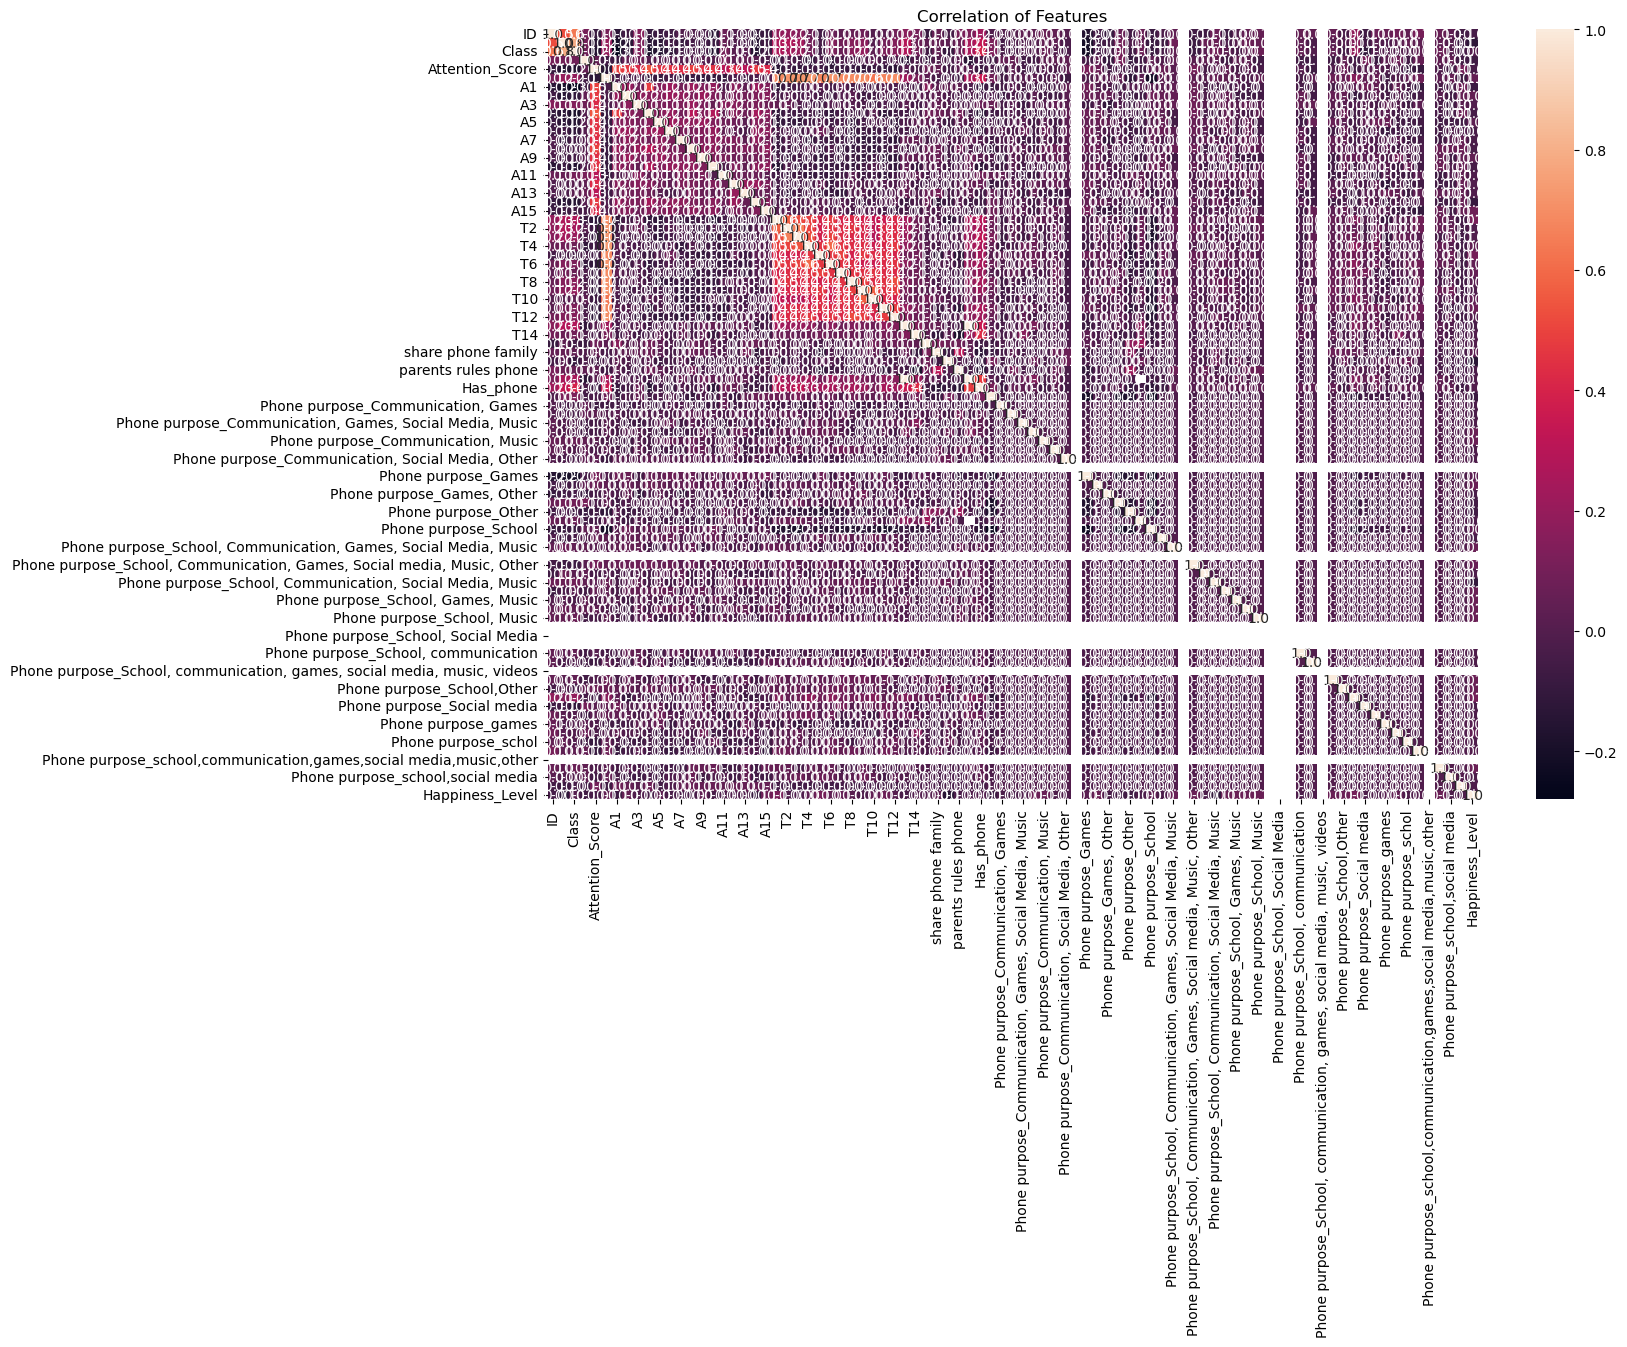

NameError: name 'df_correlation' is not defined

In [8]:
y_train_named = y_train.rename('Happiness_Level')   # <- IMPORTANT

# 1) Combine X and y for correlation (train only)
df_train = pd.concat([X_train, y_train_named], axis=1)

# 2) Correlation heatmap (optional)
plt.figure(figsize=(15, 10))
correlation_matrix = df_train.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".1f")
plt.title('Correlation of Features')
plt.show()

# 3) Rank features by absolute correlation with the target (drop the target itself)
corr_with_target = (
    correlation_matrix['Happiness_Level']
    .drop('Happiness_Level')            # <- remove target so it doesn't end up in top list
    .abs()
    .sort_values(ascending=False)
)

# 4) Choose exactly top 10 feature names
top_10 = corr_with_target.head(10).index

# 5) Guard against typos/mismatch (optional, but safe)
top_10 = [c for c in top_10 if c in X_train.columns]

df_correlation.head(10)



#plt.figure(figsize=(15, 10))
#correlation_matrix = df_train.corr()
#sns.heatmap(correlation_matrix, annot=True, fmt=".1f")
#plt.title('Correlation of Features')
#plt.show()

#top_10 = correlation_matrix['Happiness_Level'].abs().sort_values(ascending=False)[:11].index
#df_correlation = df_train[top_10]
#df_correlation.head(10)

# Merge target for correlation
#train_corr = X_train.copy()
#train_corr['Happiness_Level'] = y_train

# Compute correlation
#corr = train_corr.corr()['Happiness_Level'].abs().sort_values(ascending=False)

#corr_with_target = train_corr.corr(numeric_only=True)['Happiness_Level'].drop('Happiness_Level')
#corr_with_target_abs = corr_with_target.abs().sort_values(ascending=False)

#print("Top correlations with Happiness_Level:\n")
#print(corr_with_target_abs.head(15))



## Balancing 

In [ ]:

X_train_sel = X_train[top_10]
X_test_sel  = X_test[top_10]

#Fill in all NaN values with 0 
X_train_sel = X_train_sel.fillna(0)
X_test_sel  = X_test_sel.fillna(0)

df_smote = SMOTE(random_state=42, k_neighbors=3)
X_train_bal, y_train_bal = df_smote.fit_resample(X_train_sel, y_train)

print("Before balancing:", Counter(y_train))
print("After balancing:", Counter(y_train_bal))




NameError: name 'X_train' is not defined

In [ ]:


#X_train = X_train.fillna(0)
#X_test  = X_test.fillna(0)

#X_train_sel = X_train[top_10]
#X_test_sel = X_test[top_10]


# Apply SMOTE only to the training set
#df_smote = SMOTE(random_state=42, k_neighbors=3)  
#X_train_bal, y_train_bal = df_smote.fit_resample(X_train_sel, y_train)

#print("Before balancing:", Counter(y_train))
#print("After balancing:", Counter(y_train_bal))

##Hyperparameter optimization (Random Forest)

#dt_base = DecisionTreeClassifier(random_state=42)
#dt_base.fit(X_train_bal, y_train_bal)
#y_pred_base = dt_base.predict(X_test_bal)
#print("Baseline F1 (macro):", f1_score(y_test, y_pred_base, average='macro'))

# 2) Define parameter grid (similar to your example)
#param_grid = [{
   # 'criterion': ['gini', 'entropy'],
    #'splitter': ['best'],
    #'max_depth': [5, 10, 15, 20, None],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': [None, 'sqrt'],
    #'class_weight': [None, 'balanced']
}]

#grid = RandomizedSearchCV(
 #   estimator=DecisionTreeClassifier(random_state=42),
  #  param_distributions=param_grid[0],
   # n_iter=50,              # test 50 random combos
   # cv=5,
   # scoring='f1_macro',
   # n_jobs=-1,
    #random_state=42,
)

## Classification
Finding out which works best

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
search.fit(X_train_bal, y_train_bal)

best_dt = search.best_estimator_
print("Best parameters:", search.best_params_)
print("Best CV F1:", search.best_score_)

# Evaluate on test set
y_pred = best_dt.predict(X_test_sel)
print(classification_report(y_test, y_pred, digits=3))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 15, 'criterion': 'gini'}
Best CV F1: 0.745936914445071
              precision    recall  f1-score   support

           0      0.111     0.167     0.133         6
           1      0.667     0.632     0.649        95
           2      0.222     0.235     0.229        34

    accuracy                          0.511       135
   macro avg      0.333     0.345     0.337       135
weighted avg      0.530     0.511     0.520       135



In [ ]:

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
search.fit(X_train_bal, y_train_bal)

best_rf = search.best_estimator_
print("Best parameters:", search.best_params_)
print("Best CV F1:", search.best_score_)

# Evaluate
y_pred = best_rf.predict(X_test_sel)
print(classification_report(y_test, y_pred, digits=3))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best CV F1: 0.8130843524423869
              precision    recall  f1-score   support

           0      0.143     0.167     0.154         6
           1      0.711     0.726     0.719        95
           2      0.258     0.235     0.246        34

    accuracy                          0.578       135
   macro avg      0.371     0.376     0.373       135
weighted avg      0.572     0.578     0.575       135



In [ ]:

xgb = XGBClassifier(random_state=42, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [1, 1.5, 2]
}

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
search.fit(X_train_bal, y_train_bal)

best_xgb = search.best_estimator_
print("Best parameters:", search.best_params_)
print("Best CV F1:", search.best_score_)

# Evaluate on test
y_pred = best_xgb.predict(X_test_sel)
print(classification_report(y_test, y_pred, digits=3))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'subsample': 0.8, 'reg_lambda': 2, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Best CV F1: 0.8138347475996464
              precision    recall  f1-score   support

           0      0.143     0.167     0.154         6
           1      0.716     0.716     0.716        95
           2      0.303     0.294     0.299        34

    accuracy                          0.585       135
   macro avg      0.387     0.392     0.389       135
weighted avg      0.586     0.585     0.586       135



Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== Decision Tree ===
Best params: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini'}
Best CV F1: 0.752
[[ 1  2  3]
 [ 0 70 25]
 [ 2 20 12]]


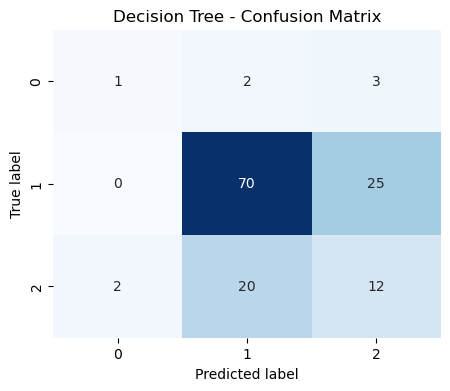

Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== Random Forest ===
Best params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best CV F1: 0.8051
[[ 1  3  2]
 [ 5 70 20]
 [ 1 25  8]]


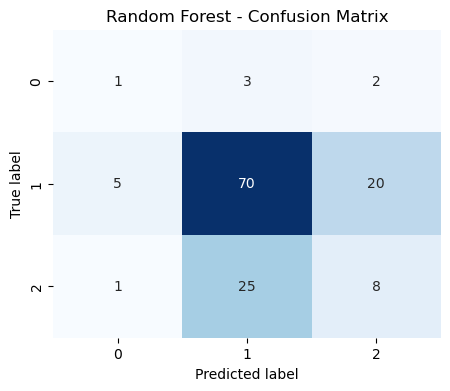

Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== XGBoost ===
Best params: {'subsample': 0.8, 'reg_lambda': 2.0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Best CV F1: 0.8103
[[ 1  4  1]
 [ 5 68 22]
 [ 1 23 10]]


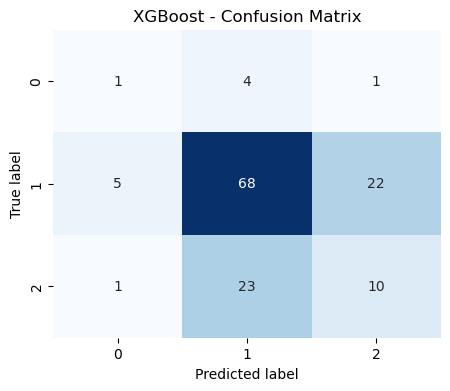


=== Model Comparison (Test Set) ===
        Model  Accuracy  Precision(macro)  Recall(macro)  F1(macro)
 DecisionTree  0.614815          0.464734       0.418817   0.431737
XGBClassifier  0.585185          0.387226       0.392191   0.389381
 RandomForest  0.585185          0.374603       0.379601   0.376412


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

# ---------------- Decision Tree ----------------
dt = DecisionTreeClassifier(random_state=42)
dt_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}
dt_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=dt_param,
    n_iter=20,
    scoring='f1_macro',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
dt_search.fit(X_train_bal, y_train_bal)
best_dt = dt_search.best_estimator_
y_pred_dt = best_dt.predict(X_test_sel)

print("\n=== Decision Tree ===")
print("Best params:", dt_search.best_params_)
print("Best CV F1:", round(dt_search.best_score_, 4))
print(confusion_matrix(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


results.append({
    'Model': 'DecisionTree',
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision(macro)': precision_score(y_test, y_pred_dt, average='macro', zero_division=0),
    'Recall(macro)': recall_score(y_test, y_pred_dt, average='macro', zero_division=0),
    'F1(macro)': f1_score(y_test, y_pred_dt, average='macro', zero_division=0),
})

# ---------------- Random Forest ----------------
rf = RandomForestClassifier(random_state=42)
rf_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param,
    n_iter=20,
    scoring='f1_macro',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rf_search.fit(X_train_bal, y_train_bal)
best_rf = rf_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_sel)

print("\n=== Random Forest ===")
print("Best params:", rf_search.best_params_)
print("Best CV F1:", round(rf_search.best_score_, 4))
print(confusion_matrix(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


results.append({
    'Model': 'RandomForest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision(macro)': precision_score(y_test, y_pred_rf, average='macro', zero_division=0),
    'Recall(macro)': recall_score(y_test, y_pred_rf, average='macro', zero_division=0),
    'F1(macro)': f1_score(y_test, y_pred_rf, average='macro', zero_division=0),
})

# ---------------- XGBoost ----------------
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [1.0, 1.5, 2.0],
}
xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param,
    n_iter=20,
    scoring='f1_macro',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
xgb_search.fit(X_train_bal, y_train_bal)
best_xgb = xgb_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_sel)

print("\n=== XGBoost ===")
print("Best params:", xgb_search.best_params_)
print("Best CV F1:", round(xgb_search.best_score_, 4))
print(confusion_matrix(y_test, y_pred_xgb))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

results.append({
    'Model': 'XGBClassifier',
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision(macro)': precision_score(y_test, y_pred_xgb, average='macro', zero_division=0),
    'Recall(macro)': recall_score(y_test, y_pred_xgb, average='macro', zero_division=0),
    'F1(macro)': f1_score(y_test, y_pred_xgb, average='macro', zero_division=0),
})

# ---------------- Comparison table ----------------
results_df = pd.DataFrame(results).sort_values('F1(macro)', ascending=False).reset_index(drop=True)
print("\n=== Model Comparison (Test Set) ===")
print(results_df.to_string(index=False))